In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'class':'a-offscreen'}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available

In [10]:
if __name__ == '__main__':

    # add your user agent 
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36 Edg/120.0.0.0', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=mouse+gaming&crid=2LS7V03UWZHTV&sprefix=mouse+gaming%2Caps%2C455&ref=nb_sb_noss_1"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[], "availability":[], "link":[]}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))
        d['link'].append("https://www.amazon.com" + link)
        
...
amazon_df = pd.DataFrame.from_dict(d)

1. Missing Data Handling

In [11]:
amazon_df.fillna(value=np.nan, inplace=True)  # Replace empty strings with NaN
amazon_df = amazon_df.dropna(subset=['title'])  # Drop rows with NaN in the 'title' column
amazon_df

,title,price,rating,reviews,availability,link
0,Rapoo VT9Pro Wireless Gaming Mouse - Esports G...,Page 1 of 1,4.5 out of 5 stars,350 ratings,Not Available,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
1,DIERYA M1SE Wired Gaming Mouse with Honeycomb ...,$16.62,4.5 out of 5 stars,852,Only 1 left in stock - order soon.,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
2,,,,,Not Available,https://www.amazon.com/Razer-DeathAdder-Essent...
3,,,,,Not Available,https://www.amazon.com/Logitech-LIGHTSPEED-Wir...
4,,,,,Not Available,https://www.amazon.com/Razer-Basilisk-Customiz...
5,,,,,Not Available,https://www.amazon.com/Logitech-Lightspeed-Pow...
6,ASUS ROG Spatha X Wireless Gaming Mouse (Magne...,$129.99,4.3 out of 5 stars,891 ratings,In Stock,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
7,,,,,Not Available,https://www.amazon.com/Razer-DeathAdder-Essent...
8,,,,,Not Available,https://www.amazon.com/LeadsaiL-Programmable-B...
9,,,,,Not Available,https://www.amazon.com/Logitech-LIGHTSYNC-Wire...


2. Data Cleaning

In [12]:
# Remove duplicate entries
amazon_df.drop_duplicates(inplace=True)

# Standardize string formats
amazon_df['title'] = amazon_df['title'].str.lower()

# Remove rows with NaN values in 'title' column or where 'availability' column indicates product is not available
amazon_df = amazon_df.dropna(subset=['title'])
amazon_df = amazon_df[amazon_df['availability'] != 'Not Available']

amazon_df

,title,price,rating,reviews,availability,link
1,dierya m1se wired gaming mouse with honeycomb ...,$16.62,4.5 out of 5 stars,852,Only 1 left in stock - order soon.,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
6,asus rog spatha x wireless gaming mouse (magne...,$129.99,4.3 out of 5 stars,891 ratings,In Stock,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
11,"asus rog harpe gaming wireless mouse, ace aim ...",$134.99,4.5 out of 5 stars,305 ratings,In Stock,https://www.amazon.com/sspa/click?ie=UTF8&spc=...


3. Data Aggregation

In [16]:
# Convert 'price' column to numeric
amazon_df['price'] = pd.to_numeric(amazon_df['price'].str.replace('$', '').replace(',', ''), errors='coerce')

# Create a new column 'budget_friendly' based on the price threshold
amazon_df['budget_friendly'] = amazon_df['price'] < budget_threshold

# Convert boolean values to 'Yes' or 'No'
amazon_df['budget_friendly'] = amazon_df['budget_friendly'].map({True: 'Yes', False: 'No'})

amazon_df


,title,price,rating,reviews,availability,link,budget_friendly
1,dierya m1se wired gaming mouse with honeycomb ...,16.62,4.5 out of 5 stars,852,Only 1 left in stock - order soon.,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Yes
6,asus rog spatha x wireless gaming mouse (magne...,129.99,4.3 out of 5 stars,891 ratings,In Stock,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,No
11,"asus rog harpe gaming wireless mouse, ace aim ...",134.99,4.5 out of 5 stars,305 ratings,In Stock,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,No


4. Data Visualization

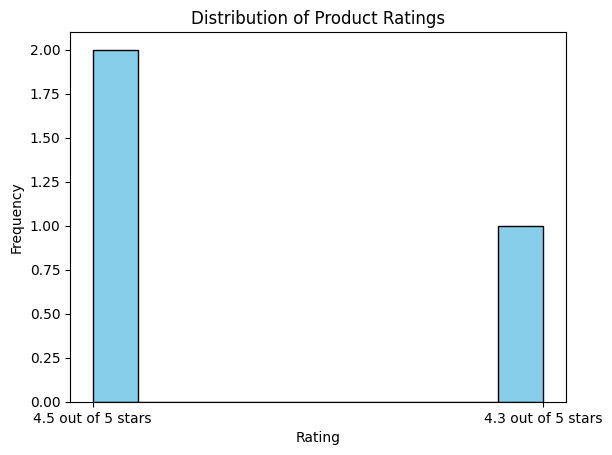

In [14]:
# Plot histogram of product ratings
plt.hist(amazon_df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()


5. Filtering Data

In [15]:
# Filter products with rating above 4.0
highly_rated_products = amazon_df[amazon_df['rating'] > '4.0']

amazon_df

,title,price,rating,reviews,availability,link
1,dierya m1se wired gaming mouse with honeycomb ...,$16.62,4.5 out of 5 stars,852,Only 1 left in stock - order soon.,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
6,asus rog spatha x wireless gaming mouse (magne...,$129.99,4.3 out of 5 stars,891 ratings,In Stock,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
11,"asus rog harpe gaming wireless mouse, ace aim ...",$134.99,4.5 out of 5 stars,305 ratings,In Stock,https://www.amazon.com/sspa/click?ie=UTF8&spc=...


Export DataFram to files CSV, Excel

In [17]:
# Export DataFrame to CSV
amazon_df.to_csv('amazon_data.csv', index=False)
# Export DataFrame to Excel
amazon_df.to_excel('amazon_data.xlsx', index=False)